# Evidence accumulation models
In this assignment, we simulate a simple *evidence accumulation model* from scratch. The following papers gives a general introduction to how evidence accumulation models (sometimes called 'sequential sampling models') are used:

- Forstmann, B. U., Ratcliff, R., & Wagenmakers, E.-J. (2016). Sequential Sampling Models in Cognitive Neuroscience: Advantages, Applications, and Extensions. Annual Review of Psychology, 67(1), 641–666. https://doi.org/10.1146/annurev-psych-122414-033645

The model we will simulate is described by Bogacz et al. (2006), p. 704, section 'DDM':

- Bogacz, R., Brown, E., Moehlis, J., Holmes, P., & Cohen, J. D. (2006). The physics of optimal decision making: A formal analysis of models of performance in two-alternative forced-choice tasks. Psychological Review, 113(4), 700–765. https://doi.org/10.1037/0033-295X.113.4.700


The model was originally proposed in (this is only intended as background literature, not required for this assigment):
- Stone, M. (1960). Models for choice-reaction time. Psychometrika, 25(3), 251–260. https://doi.org/10.1007/BF02289729
- Ratcliff, R. (1978). A theory of memory retrieval. Psychological Review, 85(2), 59–108.

Evidence accumulation models are formalized theories of decision making, often used to analyse data from two-alternative forced choice decision-making tasks. In this tasks, participants are presented with a stimulus, and are required to make a decision based on that stimulus. For example, the stimulus could be a Gabor patch tilted to the left or to the right:
<figure><img src="https://jspsychophysics.hes.kyushu-u.ac.jp/images/gabor.png"></figure>

and the participants need to respond 'left' or 'right'. Or the stimulus could be a [random-dot kinetogram](https://www.youtube.com/watch?v=7OdCe95IiLw), and the participants need to respond whether the cloud of dots moves to the left or to the right.


Evidence accumulation models assume that people make decisions by gradually accumulating evidence for each choice option while watching the stimulus. Evidence accumulation proceeds until a threshold level of evidence is reached. At that point, the decision corresponding to the threshold (sometimes called 'decision bound') is made. This is often visualized as follows:

<figure><img src='https://surfdrive.surf.nl/files/index.php/s/3ESvM7R9a5bs1LU/download'> </figure>

where the thresholds are indicated by the blue horizontal lines in the middle panel. The top threshold could indicate a choice for 'choose left', and the bottom threshold for 'choose right'. The gray line traces the evidence accumulation over time. In this example, evidence accumulation reaches the top threshold, and a choice for 'left' is made. If the stimulus indeed required a left answer, then this choice was correct.

By repeating this process over and over again across many trials, gradually, response time distributions arise:

<figure><img src='https://surfdrive.surf.nl/files/index.php/s/6pOmJXvpZzx4EDd/download'> </figure>

#### Structure of this assignment
In this assignment, we will gradually build up an evidence accumulation model in three steps:

1. We start by simulating a random walk;
2. We then end the random walk whenever a threshold is reached;
3. Then, we add a drift to the random walk

With this model, we then explore how the parameters are related to empirical data.

That covers the basics of an evidence accumulation model. With that simple model, we can simulate decision times, choices, and the effects of changing the parameters

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1. Simulate a random walk

A random walk is characterized by the differential equation:

$dx/dt = cdW$

i.e., any change in $x$ during time step $dt$ is Gaussian noise $dW$ with variance $c* dt$. So essentially, at every time step, we just add normally distributed noise to $x$.

Another way of describing the this process is the recursive equation:

$x_{i+1} = x_{i} + cdW$ 


### Assignment 1.1
To simulate a random walk process, initiate variable `x` at 0. Then, create a `for`-loop with 5000 iterations. Every iteration of the `for`-loop approximates `dt` seconds, i.e., when we set `dt = 0.001`, we simulate with a 1 millisecond time resolution, and in total we simulate 5 seconds (5000 times 1 millisecond)

In every iteration of the `for`-loop, do the following:
 - increase `x` with Gaussian noise with standard deviation $\sqrt{c* dt}$ to `x`, where `c = 1` and `dt = 0.001`
 - save the state of `x` to a vector called `xs`

After all iterations, the vector `xs` should contain the full random walk over time.

(NB: the numpy function for random Gaussian noise requests the standard deviation, not the variance, so you need to calculate the standard deviation before passing it to the function)

In [2]:
np.random.seed(5)  # don't remove this -- this makes sure the random noise is the same every time you call this function

x = 0  # starting point
xs = []  # to store the values of x at each time step

def randomWalk(iterations): # Simulate the random walk
    global x
    for i in range(iterations):
        std_dev = np.sqrt(1 * 0.001) 
        x += np.random.normal(0, std_dev)  # add Gaussian noise to x
        xs.append(x)

randomWalk(5000)


#### Assignment 1.2
After the loop, plot `xs` to visualize the random walk across time. If you implement it correctly, it should look like this:      <figure>
      <img src="https://surfdrive.surf.nl/files/index.php/s/FFKigsGcHTiInUl/download" alt="Random walk" style="width:400pt">
      </figure>


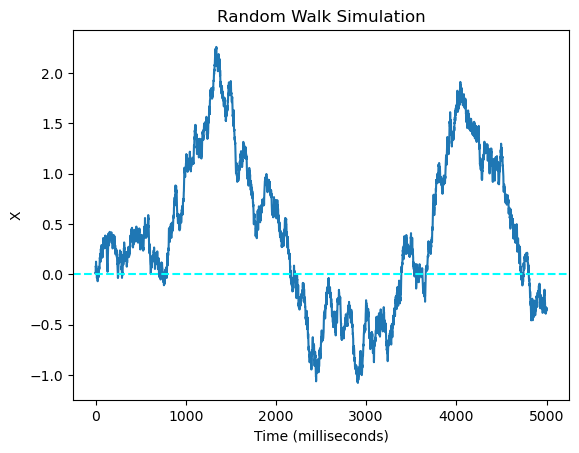

In [3]:
plt.plot(xs)
plt.xlabel('Time (milliseconds)')
plt.ylabel('X')
plt.axhline(y=0.0, color='aqua', linestyle='--')
plt.title('Random Walk Simulation')
plt.show()


## Part 2. Stop the random walk when it reaches a threshold

Assume that evidence accumulation continues until `x` reaches either `+a` or `-a`. At that point, the random walk has reached a decision. The decision time is the number of iterations required to reach the threshold (keeping in mind the time resolution: so 1000 iterations corresponds to $1000 \times dt = 1000 \times 0.001 = 1 $ second )

#### Assignment 2.1
Set `a = 0.5` and simulate the for loop until `a` is reached (with maximally 5000 iterations). What was the decision time? And which choice was made (i.e., the upper bound of `+a` or the lower bound of `-a`)?

In [4]:
# Set threshold
a = 0.5
x = 0
decision_time = 0
choice_made = "No choice"

def randomWalkThreshold(iterations, a): # Simulate the random walk with threshold
    global x
    for i in range(iterations):
        std_dev = np.sqrt(1 * 0.001)
        x += np.random.normal(0, std_dev)
        
        if x >= a:
            decision_time = (i + 1) * 0.001  # time in seconds
            choice_made = "The upper bound of +a"
            break
        elif x <= -a:
            decision_time = (i + 1) * 0.001
            choice_made = "The lower bound of -a"
            break

    return decision_time, choice_made

decision_time, choice_made = randomWalkThreshold(5000, a)

print(f"{choice_made} was chosen and the decision time was {decision_time} milliseconds.")


The lower bound of -a was chosen and the decision time was 0.161 milliseconds.


#### Assignment 2.2. Wrap your code in a function
Create a new function called `simulate_single_trial`. It takes as arguments: `a`, `c`, `dt`, and `max_time_steps`. In the function, the for loop is executed. The function returns the decision time, the choice, and `xs`

In [5]:
def simulate_single_trial(a, c, dt, max_time_steps):
    x = 0
    xs = []
    decision_time = 0
    choice_made = "No choice"

    # Simulate the random walk
    for i in range(max_time_steps):
        std_dev = np.sqrt(c * dt)
        x += np.random.normal(0, std_dev)
        xs.append(x)
        
        if x >= a:
            decision_time = (i + 1) * dt
            choice_made = "upper"
            break
        elif x <= -a:
            decision_time = (i + 1) * dt
            choice_made = "lower"
            break

    return decision_time, choice_made, xs


The function provides a conventient way to simulate multiple trials.

#### Assignment 2.3
Simulate 500 trials. After every trial, save the decision time and the choice.
What is the mean decision time across the 500 trials? And what was the error rate (the proportion of trials reaching the *lower* bound?)

In [6]:
time = []
choices = []

# Simulate 500 trials
for i in range(500):
    decision_time, choice_made, _ = simulate_single_trial(a=0.5, c=1, dt=0.001, max_time_steps=5000)
    time.append(decision_time)
    choices.append(1 if choice_made == "upper" else 0)

# Calculate Mean Decision Time (MDT here) and error rate
MDT = np.mean(time)
rate = choices.count(0) / len(choices)

print(f"Mean Decision Time = {MDT}")
print("Error Rate =", rate)


Mean Decision Time = 0.27585400000000004
Error Rate = 0.474


#### Assignment 2.4
Plot the [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) of decision times

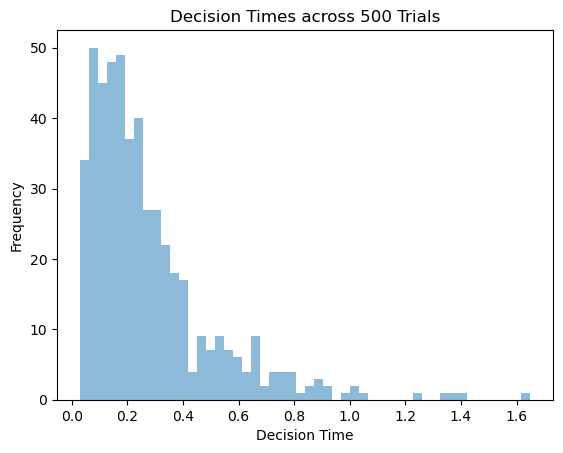

In [7]:
plt.hist(time, bins=50, alpha=0.5)
plt.xlabel("Decision Time")
plt.ylabel("Frequency")
plt.title("Decision Times across 500 Trials")
plt.show()


## Part 3. Add a drift. 

The differential equation for a random walk with drift is:

$dx/dt = vdt + cdW$

Where `v` is known as the drift rate.

#### Assignment 3.1
Implement a drift rate in the `for` loop of your function `simulate_single_trial`. Note that drift rate `v` needs to be scaled (multiplied) by `dt` before adding it to `x`!

In [8]:
def simulate_single_trial(a, c, dt, v, max_time_steps):
    x = 0
    xs = []
    decision_time = 0
    choice_made = "No choice"

    # Simulate the random walk with drift
    for i in range(max_time_steps):
        std_dev = np.sqrt(c * dt)
        x += v * dt + np.random.normal(0, std_dev)  # add drift term
        xs.append(x)

        if x >= a:
            decision_time = (i + 1) * dt
            choice_made = "upper"
            break
        elif x <= -a:
            decision_time = (i + 1) * dt
            choice_made = "lower"
            break

    return decision_time, choice_made, xs


#### Assignment 3.2
Again, simulate 500 trials. Use a drift rate of `v=1`. After every trial, store the decision time and the choice. What is the mean decision time across trials? What was the error rate?

In [9]:
decision_times = []
choices = []

# Simulate 500 trials with drift rate v=1
for i in range(500):
    decision_time, choice_made, _ = simulate_single_trial(a=1, c=1, dt=0.001, v=1, max_time_steps=5000)
    decision_times.append(decision_time)
    choices.append(1 if choice_made == "upper" else 0)

# Calculate mean decision time and error rate
mean_decision_time = np.mean(decision_times)
error_rate = choices.count(0) / len(choices)

print(f"Mean Decision Time: {mean_decision_time}")
print(f"Error Rate: {error_rate}")

Mean Decision Time: 0.821192
Error Rate: 0.126


It's possible to calculate the mean response time and the error rate analytically. Bogacz et al (2006) give the following Equations 8:

In [10]:
def ER(v, a, c):
    ''' Returns error rate (proportion of errors) given drift rate `v`, threshold `a`, and diffusion noise `c`'''
    return 1/(1+np.exp(2*v*a/c**2))
    
def DT(v, a, c):
    ''' Returns mean decision time given drift rate `v`, threshold `a`, and diffusion noise `c`'''
    if v == 0:
        ### prevent division by 0
        v = 0.00000001
    return (a/v) * np.tanh((v*a)/(c**2))

#### Assignment 3.3
Check whether your simulated mean RT and error rate approximate to the analytical mean RT and error rate. Note that due to simulation noise, small deviations from the analytical values can be expected. The more trials you simulate, the closer the analytical and simulated values should get.

In [11]:
mean_decision_time_analytic = DT(v=1, a=0.5, c=1)
error_rate_analytic = ER(v=1, a=0.5, c=1)

print(f"Simulated mean response time: {decision_time}")
print(f"Analitycal mean response time: {mean_decision_time_analytic}")
print(f"Simulated error rate: {error_rate}")
print(f"Analitycal error rate: {error_rate_analytic}")

Simulated mean response time: 0.589
Analitycal mean response time: 0.23105857863000487
Simulated error rate: 0.126
Analitycal error rate: 0.2689414213699951


## Part 4. The effects of the drift and threshold parameters
In this section, we explore what the effect is of increasing/decreasing the drift rate on the simulated data. Similarly, we explore what the effect is of increasing/decreasing the threshold on the simulated data

#### Assignment 4.1
Simulate one dataset of 500 trials with `v=1` and `a=1`, and another dataset with `v=2` and `a=1`. Compare the mean decision time, the error rate, and the histograms of the two datasets.

v=1: Mean Decision Time = 0.758, Error Rate = 0.098
v=2: Mean Decision Time = 0.48437, Error Rate = 0.008


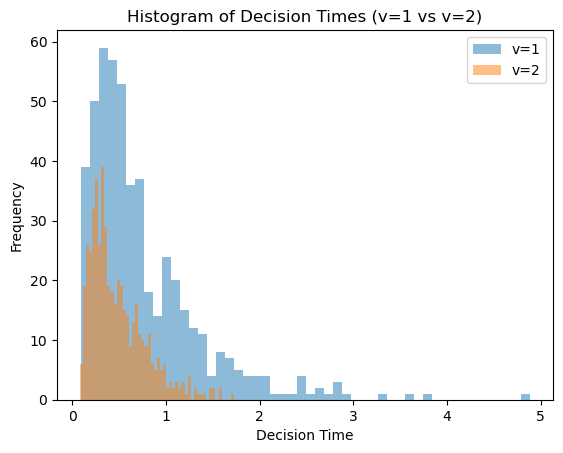

In [12]:
decision_times_v_1 = []
choices_v_1 = []
decision_times_v_2 = []
choices_v_2 = []

# Simulate for v=1 and v=2
for _ in range(500):
    decision_time, choice_made, _ = simulate_single_trial(a=1, c=1, dt=0.001, v=1, max_time_steps=5000)
    decision_times_v_1.append(decision_time)
    choices_v_1.append(choice_made)
    
    decision_time, choice_made, _ = simulate_single_trial(a=1, c=1, dt=0.001, v=2, max_time_steps=5000)
    decision_times_v_2.append(decision_time)
    choices_v_2.append(choice_made)

mean_decision_time_v_1 = np.mean(decision_times_v_1)
mean_decision_time_v_2 = np.mean(decision_times_v_2)
error_rate_v_1 = choices_v_1.count('lower') / len(choices_v_1)
error_rate_v_2 = choices_v_2.count('lower') / len(choices_v_2)

# Comparison
print(f"v=1: Mean Decision Time = {mean_decision_time_v_1}, Error Rate = {error_rate_v_1}")
print(f"v=2: Mean Decision Time = {mean_decision_time_v_2}, Error Rate = {error_rate_v_2}")

# Histogram
plt.hist(decision_times_v_1, bins=50, alpha=0.5, label="v=1")
plt.hist(decision_times_v_2, bins=50, alpha=0.5, label="v=2")
plt.xlabel("Decision Time")
plt.ylabel("Frequency")
plt.title("Histogram of Decision Times (v=1 vs v=2)")
plt.legend()
plt.show()

#### Assignment 4.2
Simulate one dataset of 500 trials with `v=1` and `a=1`, and another dataset with `v=1` and `a=1.5`. Compare the mean decision time, the error rate, and the histograms of the two datasets.

a=1: Mean Decision Time = 0.739972, Error Rate = 0.11
a=1.5: Mean Decision Time = 1.3376400000000002, Error Rate = 0.05


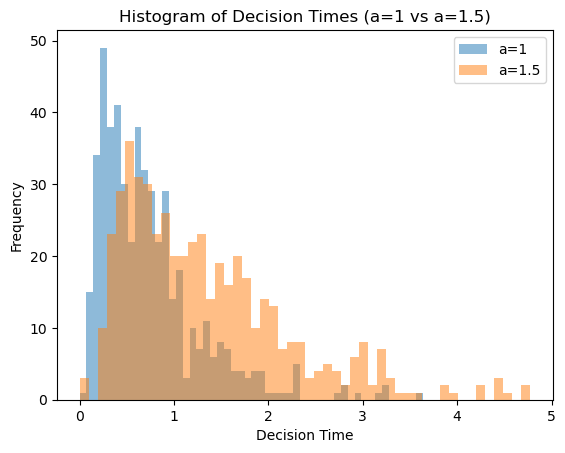

In [13]:
decision_times_a_1 = []
choices_a_1 = []
decision_times_a_15 = []
choices_a_15 = []

# Simulate for a=1 and a=1.5
for _ in range(500):
    decision_time, choice_made, _ = simulate_single_trial(a=1, c=1, dt=0.001, v=1, max_time_steps=5000)
    decision_times_a_1.append(decision_time)
    choices_a_1.append(choice_made)
    
    decision_time, choice_made, _ = simulate_single_trial(a=1.5, c=1, dt=0.001, v=1, max_time_steps=5000)
    decision_times_a_15.append(decision_time)
    choices_a_15.append(choice_made)

mean_decision_time_a_1 = np.mean(decision_times_a_1)
mean_decision_time_a_15 = np.mean(decision_times_a_15)
error_rate_a_1 = choices_a_1.count('lower') / len(choices_a_1)
error_rate_a_15 = choices_a_15.count('lower') / len(choices_a_15)

# Comparison
print(f"a=1: Mean Decision Time = {mean_decision_time_a_1}, Error Rate = {error_rate_a_1}")
print(f"a=1.5: Mean Decision Time = {mean_decision_time_a_15}, Error Rate = {error_rate_a_15}")

# Histogram
plt.hist(decision_times_a_1, bins=50, alpha=0.5, label="a=1")
plt.hist(decision_times_a_15, bins=50, alpha=0.5, label="a=1.5")
plt.xlabel("Decision Time")
plt.ylabel("Frequency")
plt.title("Histogram of Decision Times (a=1 vs a=1.5)")
plt.legend()
plt.show()


### Simulating a Single Trial of Evidence Accumulation (Additional for Report)
This function shows a single random walk (evidence accumulation process) with a drift rate `v` and a decision threshold `a`.
It stops when the random walk reaches either +a or -a, indicating a decision has been made.


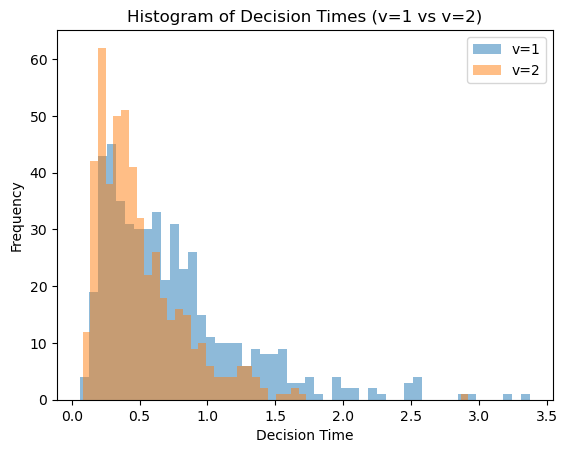

Mean Decision Time v=1: 0.7435499999999999
Mean Decision Time v=2: 0.50517


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a single trial of evidence accumulation with drift
def simulate_single_trial(a, v, max_steps=5000, dt=0.001):
    x = 0
    times = []  # To track the random walk over time
    for i in range(max_steps):
        x += v * dt + np.random.normal(0, np.sqrt(dt))
        times.append(x)
        if x >= a or x <= -a:
            return (i + 1) * dt, "upper" if x >= a else "lower", times

# v=1 and v=2 (drift rate)
decision_times_v1, decision_times_v2 = [], []
for _ in range(500):
    dt, choice, _ = simulate_single_trial(a=1, v=1)
    decision_times_v1.append(dt)
    dt, choice, _ = simulate_single_trial(a=1, v=2)
    decision_times_v2.append(dt)

plt.hist(decision_times_v1, bins=50, alpha=0.5, label="v=1")
plt.hist(decision_times_v2, bins=50, alpha=0.5, label="v=2")
plt.xlabel("Decision Time")
plt.ylabel("Frequency")
plt.title("Histogram of Decision Times (v=1 vs v=2)")
plt.legend()
plt.show()
print(f"Mean Decision Time v=1: {np.mean(decision_times_v1)}")
print(f"Mean Decision Time v=2: {np.mean(decision_times_v2)}")
